## Cross Valdiation

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = None

In [2]:
# Both features and target have already been scaled: mean = 0; SD = 1
# See Chapter 4-0 for a descrition of this dataset
path = './data/'
df = pd.read_csv(path + 'Data_HousePrice_cleaned.csv') 
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,2003,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,RL,80.0,9600,Reg,Other,Other,1Story,6,8,1976,1976,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,1,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2001,2002,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,1,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,RL,60.0,9550,IR1,Corner,Other,2Story,7,5,1915,1970,Wd Sdng,Other,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,1,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,RL,84.0,14260,IR1,Other,Other,2Story,8,5,2000,2000,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,1,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,2008,250000


A convenient way to randomly partition this dataset into separate test and
training datasets is to use the train_test_split function from scikit-learn's
model_selection submodule.

>**Model Selection : sklearn.model_selection**
>
>The selection process for the best machine learning models is largely an iterative process where data scientists search >for the best model and the best hyper-parameters. Scikit-learn offers us many useful utilities that are helpful in both >training, testing and model selection phases. In this module, there exists utilities like KFold, train_test_split(), >GridSearchCV and RandomizedSearchCV. 

In [3]:
cat_feat = list(df.dtypes[df.dtypes == 'object'].index)
numerical_feat = list(df.dtypes[df.dtypes != 'object'].index)

cat_dataset = df[cat_feat].copy()
num_dataset = df[numerical_feat].copy()
df_numerical = pd.DataFrame(num_dataset, columns=numerical_feat)

cat_dummies = pd.get_dummies(cat_dataset)
df = pd.concat([df_numerical, cat_dummies], axis = 1)

In [4]:
df.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_Other,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_Other,LotShape_Reg,LotConfig_Corner,LotConfig_Inside,LotConfig_Other,Neighborhood_CollgCr,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_Somerst,HouseStyle_1.5Fin,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Other,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Gd,ExterQual_Other,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_Other,Foundation_PConc,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_Other,HeatingQC_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_Other,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0


In [5]:
from sklearn.model_selection import train_test_split

cols = list(df.columns)
cols.remove('SalePrice')
X = df[cols].copy()
y = df['SalePrice'].copy()

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=0)

X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

print("X_train & y_train shape:", X_train.shape, y_train.shape)
print("X_test & y_test shape:", X_test.shape, y_test.shape)

X_train & y_train shape: (1536, 110) (1536,)
X_test & y_test shape: (659, 110) (659,)


In [6]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_Other,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_Other,LotShape_Reg,LotConfig_Corner,LotConfig_Inside,LotConfig_Other,Neighborhood_CollgCr,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_Somerst,HouseStyle_1.5Fin,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Other,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Gd,ExterQual_Other,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_Other,Foundation_PConc,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_Other,HeatingQC_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_Other,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf
0,70,60.0,9600,5,7,1910,2002,0.0,0,0,264,264,768,664,0,1432,0.0,0.0,2,0,2,1,7,0,1910.0,2,360,270,0,112,0,0,0,0,5,2007,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1
1,80,120.0,19296,6,5,1962,1962,399.0,672,690,0,1362,1382,0,0,1382,1.0,0.0,1,0,3,1,6,1,1991.0,2,884,0,0,252,0,0,0,0,5,2009,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1
2,20,72.0,8872,5,8,1965,2008,300.0,595,0,317,912,912,0,0,912,1.0,0.0,1,0,2,1,5,0,1992.0,2,576,0,240,0,0,0,0,0,12,2008,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3,50,60.0,7200,6,5,1954,1954,0.0,673,0,181,854,854,424,0,1278,0.0,0.0,1,0,4,1,6,0,1954.0,1,240,0,0,0,0,0,0,0,4,2008,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1
4,20,107.0,11362,8,5,2004,2005,42.0,1039,0,797,1836,1836,0,0,1836,1.0,0.0,2,0,3,1,7,1,2004.0,3,862,125,185,0,0,0,0,0,3,2009,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0


In [7]:
if 'SalePrice' in numerical_feat:
    numerical_feat.remove('SalePrice')
categorical_features = [feat for feat in list(X_train.columns) if feat not in numerical_feat]
#categorical_features

#### This can be an error for cross-validation, because we scale validation date with information off all the training set!!!

In [8]:
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()

sd.fit(X_train[numerical_feat])
X_train_scaled = sd.transform(X_train[numerical_feat])
df_train_scaled = pd.DataFrame(X_train_scaled, columns=numerical_feat)
df_train = pd.concat([df_train_scaled, X_train[categorical_features]], axis = 1)


X_test_scaled = sd.transform(X_test[numerical_feat])
df_test_scaled = pd.DataFrame(X_test_scaled, columns=numerical_feat)
df_test = pd.concat([df_test_scaled, X_test[categorical_features]], axis = 1)

print("X_train & y_train shape:", df_train.shape, y_train.shape)
print("X_test & y_test shape:", df_test.shape, y_test.shape)

X_train & y_train shape: (1536, 110) (1536,)
X_test & y_test shape: (659, 110) (659,)


In [9]:
#df_train.head()

In [10]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV

params = [
  {'alpha': [1, 5, 10, 20, 100, 1000], 'kernel': ['linear']},
  {'alpha': [1, 5, 10, 20, 100, 1000], 'kernel': ['poly'], "degree" : [2,3]},
  {'alpha': [1, 5, 10, 20, 100, 1000], 'gamma': [0.01, 0.1, 0.5], 'kernel': ['rbf']},
    ]

base_estimator = KernelRidge()

In [11]:
gd = GridSearchCV(
    base_estimator,  ## model to fit
    params, # grid of hyperparameter
    cv = 5,  # if integer assume k-fold, could assign any type of splitting method (see sklearn.model_selection)
    scoring = "neg_mean_squared_error", # scoring method to evaluate a model (https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)
    n_jobs =2,
    verbose = 3, refit=True
)

In [12]:
gd.fit(df_train.values, y_train) ## number of fits (6+ (6*2) + (6*3)) * 5

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=KernelRidge(), n_jobs=2,
             param_grid=[{'alpha': [1, 5, 10, 20, 100, 1000],
                          'kernel': ['linear']},
                         {'alpha': [1, 5, 10, 20, 100, 1000], 'degree': [2, 3],
                          'kernel': ['poly']},
                         {'alpha': [1, 5, 10, 20, 100, 1000],
                          'gamma': [0.01, 0.1, 0.5], 'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=3)

In [13]:
result = pd.DataFrame(gd.cv_results_)

In [20]:
result.sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_kernel,param_degree,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,0.051237,0.000970,0.004312,0.000364,1,poly,2,NaN,"{'alpha': 1, 'degree': 2, 'kernel': 'poly'}",-4.445905e+08,-5.029924e+08,-4.246816e+08,-4.551350e+08,-3.634067e+08,-4.381612e+08,4.539264e+07,1
7,0.078333,0.002146,0.012265,0.000958,1,poly,3,NaN,"{'alpha': 1, 'degree': 3, 'kernel': 'poly'}",-4.628487e+08,-4.869827e+08,-4.464185e+08,-4.481555e+08,-3.564114e+08,-4.401633e+08,4.432619e+07,2
9,0.081352,0.000535,0.012376,0.001100,5,poly,3,NaN,"{'alpha': 5, 'degree': 3, 'kernel': 'poly'}",-4.771705e+08,-4.965999e+08,-4.894637e+08,-4.414729e+08,-3.826455e+08,-4.574705e+08,4.194633e+07,3
11,0.079886,0.004996,0.011235,0.000268,10,poly,3,NaN,"{'alpha': 10, 'degree': 3, 'kernel': 'poly'}",-5.218129e+08,-5.062217e+08,-5.281428e+08,-4.692933e+08,-4.412158e+08,-4.933373e+08,3.311512e+07,4
8,0.048031,0.000989,0.003951,0.000279,5,poly,2,NaN,"{'alpha': 5, 'degree': 2, 'kernel': 'poly'}",-5.286962e+08,-5.095445e+08,-5.272875e+08,-4.993147e+08,-4.558829e+08,-5.041452e+08,2.653320e+07,5
13,0.079798,0.003024,0.011804,0.000442,20,poly,3,NaN,"{'alpha': 20, 'degree': 3, 'kernel': 'poly'}",-6.090701e+08,-5.229131e+08,-6.146378e+08,-5.374043e+08,-5.499537e+08,-5.667958e+08,3.781319e+07,6
10,0.045663,0.001321,0.004002,0.000014,10,poly,2,NaN,"{'alpha': 10, 'degree': 2, 'kernel': 'poly'}",-6.222917e+08,-5.194692e+08,-6.417522e+08,-5.717087e+08,-5.574817e+08,-5.825407e+08,4.429322e+07,7
1,0.050401,0.003937,0.003758,0.000345,5,linear,NaN,NaN,"{'alpha': 5, 'kernel': 'linear'}",-5.663513e+08,-6.348391e+08,-6.227654e+08,-6.096676e+08,-4.953287e+08,-5.857904e+08,5.080206e+07,8
2,0.050771,0.001841,0.003651,0.000468,10,linear,NaN,NaN,"{'alpha': 10, 'kernel': 'linear'}",-5.641259e+08,-6.309498e+08,-6.290993e+08,-6.091070e+08,-4.962214e+08,-5.859007e+08,5.089322e+07,9
0,0.068158,0.024887,0.003735,0.000778,1,linear,NaN,NaN,"{'alpha': 1, 'kernel': 'linear'}",-5.749777e+08,-6.407738e+08,-6.199903e+08,-6.128204e+08,-4.966887e+08,-5.890502e+08,5.084551e+07,10


In [31]:
#result.sort_values("rank_test_score").head(1)["params"].values[0]

In [32]:
best_params = result.sort_values("rank_test_score").head(1)["params"].values[0]  #take head(1), i.e. the best

In [33]:
best_params

{'alpha': 1, 'degree': 2, 'kernel': 'poly'}

In [34]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

def plot_result(y_prediction, Y_true):
    fig , ax = plt.subplots(1,1,figsize=(10,5))
    ax.scatter(y_prediction, Y_true)
    ax.plot([0,500000],[0,500000], "--", c='red', label = "$Y_{pred} = Y_{true}$")
    ax.set_xlabel("$Y_{pred}$", fontsize = 12)
    ax.set_ylabel("$Y_{true}$", fontsize = 12)
    plt.legend()
    plt.show()
    print("mean_absolute_error:", mean_absolute_error(y_prediction, Y_true))
    print("mean_squared_error:", mean_squared_error(y_prediction, Y_true))
    print("mean_absolute_percentage_error:", mean_absolute_percentage_error(y_prediction, Y_true))

TEST RESULT


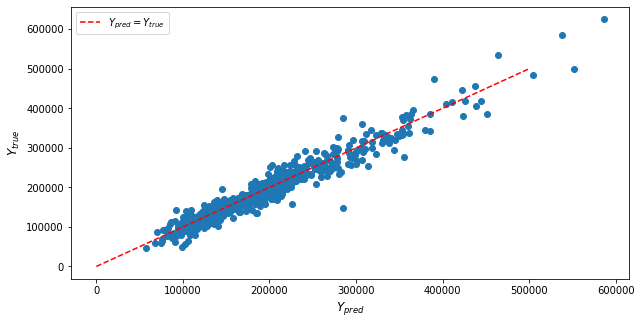

mean_absolute_error: 13873.933328163741
mean_squared_error: 376893235.4500312
mean_absolute_percentage_error: 0.07728469774259912
TRAIN RESULT


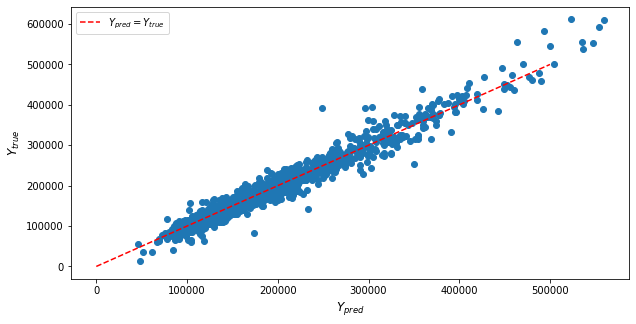

mean_absolute_error: 11828.56326488567
mean_squared_error: 297131826.8446222
mean_absolute_percentage_error: 0.06643489190188288


In [35]:
best_model = KernelRidge(**best_params)
best_model.fit(df_train, y_train)

y_pred_test = best_model.predict(df_test)

y_pred_train = best_model.predict(df_train)

print("TEST RESULT")
plot_result(y_pred_test, y_test)

print("TRAIN RESULT")
plot_result(y_pred_train, y_train)

In [36]:
#best_model